In [2]:
# 引入所需要的全部包
from sklearn.model_selection import train_test_split # 数据划分的类

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import time

In [3]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [4]:
# 加载数据
# 日期、时间、有功功率、无功功率、电压、电流、厨房用电功率、洗衣服用电功率、热水器用电功率
path1='datas/household_power_consumption_1000.txt'
df = pd.read_csv(path1, sep=';', low_memory=False)#没有混合类型的时候可以通过low_memory=F调用更多内存，加快效率）
"""low_memory : bool, default True
        Internally process the file in chunks, resulting in lower memory use
        while parsing, but possibly mixed type inference.  To ensure no mixed
        types either set False, or specify the type with the `dtype` parameter.
        Note that the entire file is read into a single DataFrame regardless,
        use the `chunksize` or `iterator` parameter to return the data in chunks.
        (Only valid with C parser)."""

In [5]:
df.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0


In [16]:
## 功率和电流之间的关系
X = df.iloc[:,2:4] # 取第3列和第4列的所有行数据
Y2 = df.iloc[:,5] # 取第6列的所有行数据   

In [17]:
## 数据分割
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=0)

In [8]:
type(X2_train)

pandas.core.frame.DataFrame

In [21]:
# 将X和Y转换为矩阵的形式
X = np.mat(X2_train)
Y = np.mat(Y2_train).reshape(-1,1)

In [10]:
type(X)

numpy.matrix

In [22]:
# 计算θ
theta = (X.T * X).I * X.T * Y  # X.I表示求X的逆矩阵；X.T表示求X的转置矩阵
print(theta)

[[4.20324605]
 [1.36676171]]


In [12]:
# 对测试集合进行测试
y_hat = np.mat(X2_test) * theta

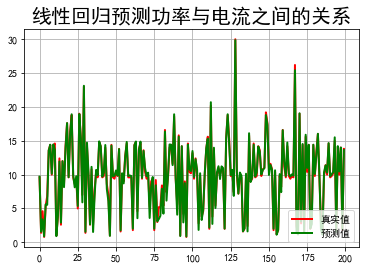

In [13]:
# 画图看看
#### 电流关系
t=np.arange(len(X2_test))
plt.figure(facecolor='w')
plt.plot(t, Y2_test, 'r-', linewidth=2, label=u'真实值')
plt.plot(t, y_hat, 'g-', linewidth=2, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u"线性回归预测功率与电流之间的关系", fontsize=20)
plt.grid(b=True)
plt.show()